# References

[Course Webpage](https://sites.google.com/view/berkeley-cs294-158-sp20/home)

[1] Pathak, Deepak, et al. "Context encoders: Feature learning by inpainting." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.

[2] Gidaris, Spyros, Praveer Singh, and Nikos Komodakis. "Unsupervised representation learning by predicting image rotations." arXiv preprint arXiv:1803.07728 (2018).

[3] Chen, Ting, et al. "A simple framework for contrastive learning of visual representations." arXiv preprint arXiv:2002.05709 (2020).

[4] Noroozi, Mehdi, and Paolo Favaro. "Unsupervised learning of visual representations by solving jigsaw puzzles." European Conference on Computer Vision. Springer, Cham, 2016.

[5] Wang, Xiaolong, Allan Jabri, and Alexei A. Efros. "Learning correspondence from the cycle-consistency of time." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2019.

[6] Oord, Aaron van den, Yazhe Li, and Oriol Vinyals. "Representation learning with contrastive predictive coding." arXiv preprint arXiv:1807.03748 (2018).

[7] Hénaff, Olivier J., et al. "Data-efficient image recognition with contrastive predictive coding." arXiv preprint arXiv:1905.09272 (2019).

[8] Tian, Yonglong, Dilip Krishnan, and Phillip Isola. "Contrastive multiview coding." arXiv preprint arXiv:1906.05849 (2019).

[9] He, Kaiming, et al. "Momentum contrast for unsupervised visual representation learning." arXiv preprint arXiv:1911.05722 (2019).

[10] Doersch, Carl, Abhinav Gupta, and Alexei A. Efros. "Unsupervised visual representation learning by context prediction." Proceedings of the IEEE International Conference on Computer Vision. 2015.

[11] Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "U-net: Convolutional networks for biomedical image segmentation." International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

# Getting Started
Go to **Runtime -> Change runtime type** and make sure **Hardward accelerator** is set to **GPU**

In [1]:
!if [ -d cs294-158-ssl ]; then rm -Rf cs294-158-ssl; fi
!git clone https://github.com/ckurtz/cs294-158-ssl
!pip install cs294-158-ssl/

import os
os.chdir('cs294-158-ssl')

Cloning into 'cs294-158-ssl'...
remote: Enumerating objects: 611, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 611 (delta 115), reused 119 (delta 53), pack-reused 422 (from 1)
Receiving objects: 100% (611/611), 3.11 MiB | 6.43 MiB/s, done.
Resolving deltas: 100% (424/424), done.
Processing ./cs294-158-ssl
  Preparing metadata (setup.py) ... done
  Created wheel for deepul_helper: filename=deepul_helper-0.1.0-py3-none-any.whl size=25300 sha256=5c1aefe8b29f52a4039c773fe7d4feb49955088667800a68c483304ef5397268
  Stored in directory: /root/.cache/pip/wheels/e3/df/97/281e32d717214451862e0e558746de423b9ef530b7376421e2
Successfully built deepul_helper


Run the cells below to download the necessary pretrained models. It should take a few minutes.

In [2]:
!wget https://camille-kurtz.com/teaching/data.zip
!unzip -qq data.zip
!rm data.zip

--2024-11-01 09:39:32--  https://camille-kurtz.com/teaching/data.zip
Resolving camille-kurtz.com (camille-kurtz.com)... 213.186.33.3
Connecting to camille-kurtz.com (camille-kurtz.com)|213.186.33.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4227668031 (3.9G) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   3.94G  18.0MB/s    in 3m 48s  

2024-11-01 09:43:22 (17.7 MB/s) - ‘data.zip’ saved [4227668031/4227668031]



In [3]:
!wget https://camille-kurtz.com/teaching/results.zip
!unzip -qq results.zip
!rm results.zip

--2024-11-01 09:44:11--  https://camille-kurtz.com/teaching/results.zip
Resolving camille-kurtz.com (camille-kurtz.com)... 213.186.33.3
Connecting to camille-kurtz.com (camille-kurtz.com)|213.186.33.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2636425194 (2.5G) [application/zip]
Saving to: ‘results.zip’

results.zip         100%[===================>]   2.46G  17.8MB/s    in 2m 25s  

2024-11-01 09:46:38 (17.4 MB/s) - ‘results.zip’ saved [2636425194/2636425194]



The models and demos shown were pre-trained. The code used for all the demos can be found in the github repo [here](https://github.com/wilson1yan/cs294-158-ssl). Follow the README to train models on CIFAR10 or ImageNet.

# Self-Supervised Learning Tasks
Self-supervised learning is a rapidly growing field, its success largely accelerated by growing compute and the vast amount of unlabeled data available for training. The hope is that by pretraining on specially designed self-supervised tasks, the models would be able to learn semantically meaningful representations to be used for downstream tasks. In the following demos, we will look at a few examples of these self-supervised tasks.

In [4]:
from deepul_helper.demos import load_model_and_data, evaluate_accuracy, display_nearest_neighbors, show_context_encoder_inpainting

%matplotlib inline

## Demo 1: Context Encoder [[1]](https://arxiv.org/abs/1604.07379)

The context encoder structures its self-supervised learning task by inpainting masked images. For example, the figure below shows different masking shapes, such as center masking, random block masking, and segmentation masking. Note that segmentation masking (c) is not purely self-supervised since we would need to train a image segmentation model which requires labels. However, the other two masking schemes (a) and (b) and purely self-supervised.

![](https://drive.google.com/uc?id=1fhzkULYTtyMGUUF2n9dlPayJSdcY5pRv)

More formally, the context encoder optimizes the following reconstruction loss:
$$\mathcal{L}_{rec} = \left\Vert \hat{M} \odot (x - F((1 - \hat{M})\odot x)) \right\Vert^2_2$$
where $\hat{M}$ is the masked region, $x$ is the image, and $F$ is the context encoder that tries to reconstruct the masked portion. In addition to the reconstruction loss, the paper introduces an adversarial loss that encourages more realistic inpaintings.
$$L_{adv} = \max_D \mathbb{E}_{x\in \chi} [\log(D(x)) + \log(1 - D(F((1-\hat{M})\odot x)))]$$
However, this demo does not use the adversarial portion of the loss.

### Example Code

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class ContextEncoder(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, dataset, n_classes):
        super().__init__()
        input_channels = 3

        self.latent_dim = 4000

        # Encodes the masked image
        self.encoder = nn.Sequential(
            # 128 x 128 Input
            nn.Conv2d(input_channels, 64, 4, stride=2, padding=1), # 64 x 64
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64, 4, stride=2, padding=1), # 32 x 32
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, stride=2, padding=1), # 16 x 16
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, stride=2, padding=1), # 8 x 8
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, stride=2, padding=1), # 4 x 4
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, self.latent_dim, 4) # 1 x 1
        )

        # Only reconstructs the masked part of the image and not the whole image
        self.decoder = nn.Sequential(
           nn.BatchNorm2d(self.latent_dim),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(self.latent_dim, 512, 4, stride=1, padding=0), # 4 x 4
           nn.BatchNorm2d(512),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1), # 8 x 8
           nn.BatchNorm2d(256),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1), # 16 x 16
           nn.BatchNorm2d(128),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1), # 32 x 32
           nn.BatchNorm2d(64),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(64, input_channels, 4, stride=2, padding=1), # 64 x 64
           nn.Tanh()
        )

        self.dataset = dataset
        self.n_classes = n_classes

    def construct_classifier(self):
        classifier = nn.Sequential(
            nn.Flatten(),
            nn.BatchNorm1d(self.latent_dim, affine=False),
            nn.Linear(self.latent_dim, self.n_classes)
        )
        return classifier

    def forward(self, images):
        # Extract a 64 x 64 center from 128 x 128 image
        images_center = images[:, :, 32:32+64, 32:32+64].clone()
        images_masked = images.clone()
        # Mask out a 64 x 64 center with slight overlap
        images_masked[:, 0, 32+4:32+64-4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64-4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64-4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0

        z = self.encoder(images_masked)
        center_recon = self.decoder(z)

        return dict(Loss=F.mse_loss(center_recon, images_center)), torch.flatten(z, 1)

    def encode(self, images):
        images_masked = images
        images_masked[:, 0, 32+4:32+64-4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64-4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64-4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0
        return self.encoder(images_masked)

    def reconstruct(self, images):
        images_center = images[:, :, 32:32+64, 32:32+64].clone()
        images_masked = images.clone()
        images_masked[:, 0, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0

        z = self.encoder(images_masked)
        center_recon = self.decoder(z)

        images_recon = images_masked.clone()
        images_recon[:, :, 32:32+64, 32:32+64] = center_recon
        return images_masked, images_recon


### Inpainting Examples
For each pair of images, the left image is the masked input and the right the inpainted reconstruction.

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/content/cs294-158-ssl/deepul_helper/demos.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickli

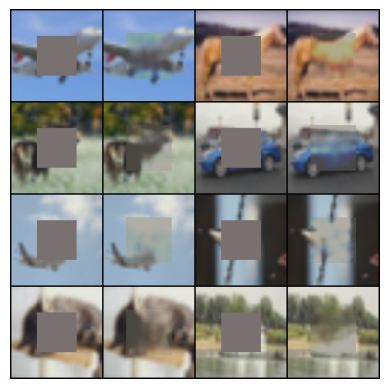

In [ ]:
show_context_encoder_inpainting()

### Linear Classification
By design the model architecture is an encoder -> decoder module. We can use the bottleneck layer as our learned representation. Below, we show linear classification accuracy results on CIFAR10 using the learned representations.

In [ ]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('context_encoder')
evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

Files already downloaded and verified
Files already downloaded and verified
Train Set
Top 1 Accuracy: 53.236, Top 5 Accuracy: 94.094

Test Set
Top 1 Accuracy: 45.77, Top 5 Accuracy: 90.29



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


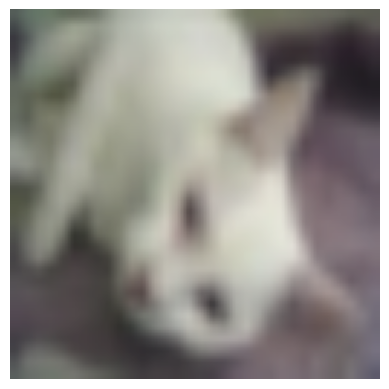

Top 16 Nearest Neighbors (in latent space)


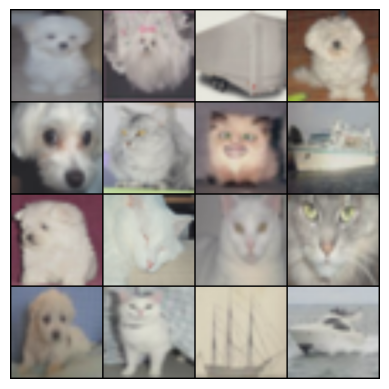

Image 2


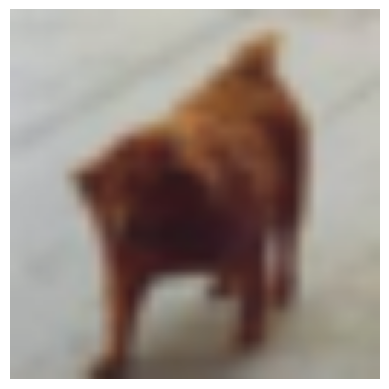

Top 16 Nearest Neighbors (in latent space)


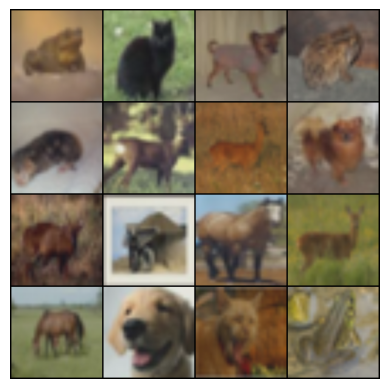

Image 3


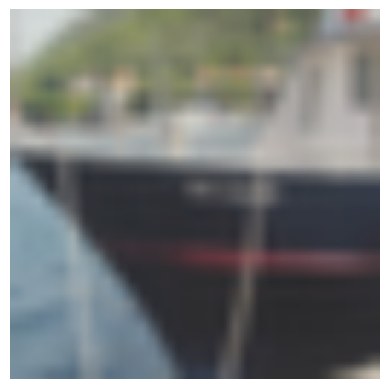

Top 16 Nearest Neighbors (in latent space)


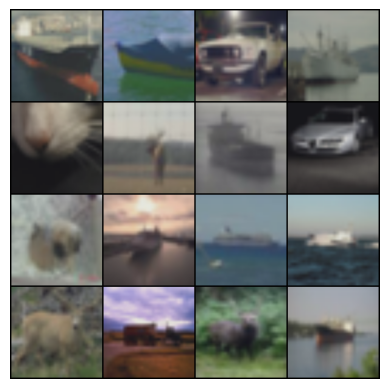

Image 4


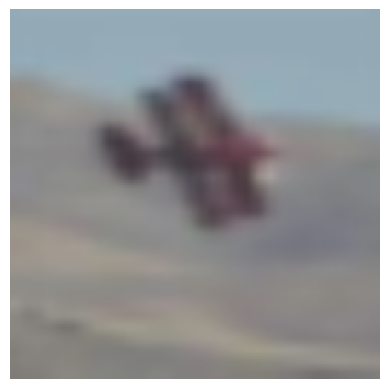

Top 16 Nearest Neighbors (in latent space)


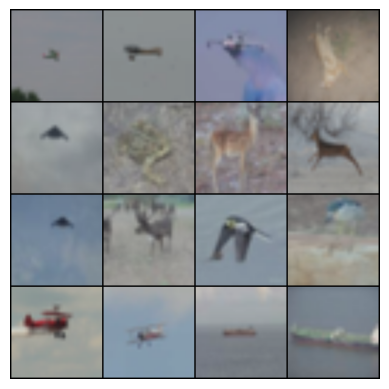

In [ ]:
display_nearest_neighbors('context_encoder', model, test_loader)

## Demo 2: Rotation Prediction [[2]](https://arxiv.org/abs/1803.07728)

In this paper, the authors show that accurately predicting the degrees of rotation in images is a self-supervised learning task that learns good representations for downstream tasks.

![](https://drive.google.com/uc?id=1eHXLH-N_6uMGRzdf1Wjnga26qlS5-FRv)

More specifically, the authors showed that training a common CNN architecture (AlexNet, ResNet) on the rotation task learns semantically interpretable convolutional masks similar to those learned in supervised learning.

### Example Code

In [ ]:
import math

import torch
import torch.nn as nn
import torch.nn.functional as F


class RotationPrediction(nn.Module):
    metrics = ['Loss', 'Acc1']
    metrics_fmt = [':.4e', ':6.2f']

    def __init__(self, dataset, n_classes):
        super().__init__()
        if dataset == 'cifar10':
            self.model = NetworkInNetwork()
            self.latent_dim = 192 * 8 * 8
            self.feat_layer = 'conv2'
        elif 'imagenet' in dataset:
            self.model = AlexNet()
            self.latent_dim = 256 * 13 * 13
            self.feat_layer = 'conv5'
        else:
            raise Exception('Unsupported dataset:', dataset)
        self.dataset = dataset
        self.n_classes = n_classes

    def construct_classifier(self):
        if self.dataset == 'cifar10':
            classifier = nn.Sequential(
                Flatten(),
                nn.BatchNorm1d(self.latent_dim, affine=False),
                nn.Linear(self.latent_dim, self.n_classes)
            )
        elif 'imagenet' in self.dataset:
            classifier = nn.Sequential(
                nn.AdaptiveMaxPool2d((6, 6)),
                nn.BatchNorm2d(256, affine=False),
                Flatten(),
                nn.Linear(256 * 6 * 6, self.n_classes)
            )
        else:
            raise Exception('Unsupported dataset:', dataset)
        return classifier

    def forward(self, images):
        batch_size = images.shape[0]
        images, targets = self._preprocess(images)
        targets = targets.to(images.get_device())

        logits, zs = self.model(images, out_feat_keys=('classifier', self.feat_layer))
        loss = F.cross_entropy(logits, targets)

        pred = logits.argmax(dim=-1)
        correct = pred.eq(targets).float().sum()
        acc = correct / targets.shape[0] * 100.

        return dict(Loss=loss, Acc1=acc), zs[:batch_size]

    def encode(self, images):
        zs = self.model(images, out_feat_keys=(self.feat_layer,))
        return zs

    def _preprocess(self, images):
        batch_size = images.shape[0]
        images_90 = torch.flip(images.transpose(2, 3), (2,))
        images_180 = torch.flip(images, (2, 3))
        images_270 = torch.flip(images, (2,)).transpose(2, 3)
        images_batch = torch.cat((images, images_90, images_180, images_270), dim=0)
        targets = torch.arange(4).long().repeat(batch_size)
        targets = targets.view(batch_size, 4).transpose(0, 1)
        targets = targets.contiguous().view(-1)
        return images_batch, targets

### Linear Classification
We can use the feature maps in the later convolutional layers of the pretrained model as our learned representation for linear classification.

In [ ]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('rotation')
evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

Files already downloaded and verified
Files already downloaded and verified
Train Set
Top 1 Accuracy: 79.39, Top 5 Accuracy: 99.164

Test Set
Top 1 Accuracy: 79.91, Top 5 Accuracy: 99.12



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


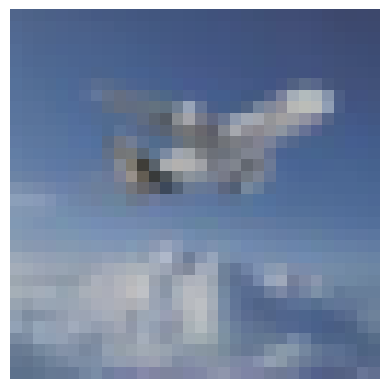

Top 16 Nearest Neighbors (in latent space)


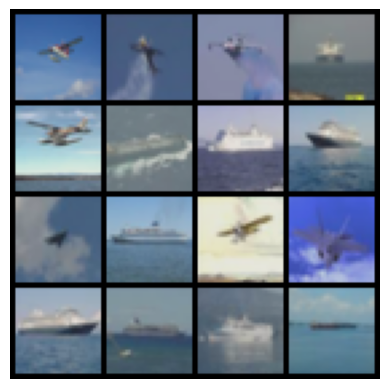

Image 2


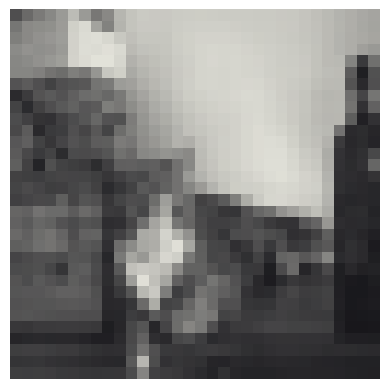

Top 16 Nearest Neighbors (in latent space)


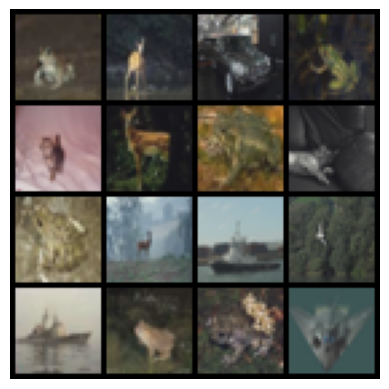

Image 3


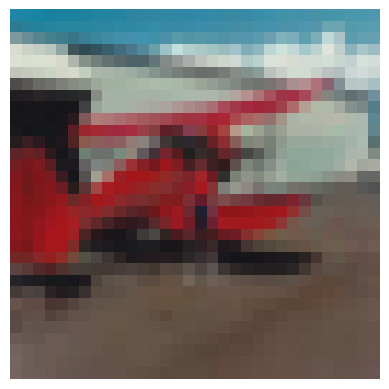

Top 16 Nearest Neighbors (in latent space)


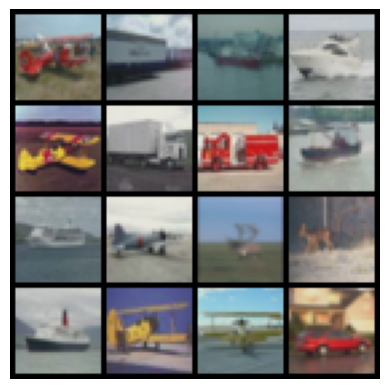

Image 4


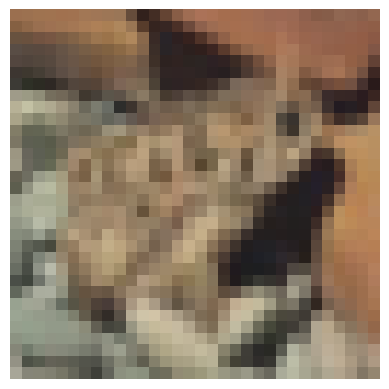

Top 16 Nearest Neighbors (in latent space)


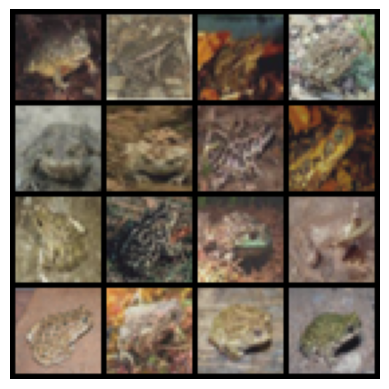

In [ ]:
display_nearest_neighbors('rotation', model, test_loader)

## Demo 3: SimCLR [[3]](https://arxiv.org/abs/2002.05709)

SimCLR is a contrastive learning framework to learn strong visual representations. An image $x$ is processed using data augmentation to produce two variants $x_i$ and $x_j$ which are both fed into encoder $f$ (a CNN) and projection head $g$ (a small MLP). The models optimize a contrastive loss to maximally align projected latents $z_i, z_j$. We consider $x_i, x_j$ as a positive pair, and any other $x_i, x_k$ pairs (i.e. different images in the same batch) are negative pairs. A visual diagram of the training procedure is shown below (from the paper).

![](https://drive.google.com/uc?id=1XW1uIkUTMSa0DZncivSYXzM5gA5FIhF6)

More formally, the loss between positive example $z_i, z_j$ is:
$$\ell_{i,j} = -\log{\frac{\exp(\text{sim}(z_i, z_j)/\tau)}{\sum_{k=1}^{2N}\mathbb{1}_{[k\neq i]}\exp(\text{sim}(z_i, z_k)/\tau)}}$$
where $\text{sim}(z_i, z_j) = z_i^Tz_j / (\left\Vert z_i \right\Vert \left\Vert z_j \right\Vert)$. The loss function can also be interpreted as a standard cross entropy loss to classify positive samples where logits are constructed using a given similarity function.

Note: A common idea in contrastive learning methods is that a larger batch means more negative samples. Therefore, these methods usually benefit the most from large-batch learning compared to other self-supervised learning tasks.

### Example Code

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from deepul_helper.resnet import resnet_v1
from deepul_helper.batch_norm import SyncBatchNorm, BatchNorm1d

# Some code adapted from https://github.com/sthalles/SimCLR
class SimCLR(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, dataset, n_classes, dist=None):
        super().__init__()
        self.temperature = 0.5
        self.projection_dim = 128

        if dataset == 'cifar10':
            resnet = resnet_v1((3, 32, 32), 50, 1, cifar_stem=True)
            resnet = SyncBatchNorm.convert_sync_batchnorm(resnet)
            self.resnet = resnet
            self.latent_dim = 2048
        elif 'imagenet' in dataset:
            resnet = resnet_v1((3, 128, 128), 50, 1, cifar_stem=False)
            if dist is not None:
                resnet = nn.SyncBatchNorm.convert_sync_batchnorm(resnet)
            self.resnet = resnet
            self.latent_dim = 2048

        self.proj = nn.Sequential(
            nn.Linear(self.latent_dim, self.projection_dim, bias=False),
            BatchNorm1d(self.projection_dim),
            nn.ReLU(inplace=True),
            nn.Linear(self.projection_dim, self.projection_dim, bias=False),
            BatchNorm1d(self.projection_dim, center=False)
        )

        self.dataset = dataset
        self.n_classes = n_classes
        self.dist = dist

    def construct_classifier(self):
        return nn.Sequential(nn.Linear(self.latent_dim, self.n_classes))

    def forward(self, images):
        n = images[0].shape[0]
        xi, xj = images
        hi, hj = self.encode(xi), self.encode(xj) # (N, latent_dim)
        zi, zj = self.proj(hi), self.proj(hj) # (N, projection_dim)
        zi, zj = F.normalize(zi), F.normalize(zj)

        # Each training example has 2N - 2 negative samples
        # 2N total samples, but exclude the current and positive sample

        if self.dist is None:
            zis = [zi]
            zjs = [zj]
        else:
            zis = [torch.zeros_like(zi) for _ in range(self.dist.get_world_size())]
            zjs = [torch.zeros_like(zj) for _ in range(self.dist.get_world_size())]

            self.dist.all_gather(zis, zi)
            self.dist.all_gather(zjs, zj)

        z1 = torch.cat((zi, zj), dim=0) # (2N, projection_dim)
        z2 = torch.cat(zis + zjs, dim=0) # (2N * n_gpus, projection_dim)

        sim_matrix = torch.mm(z1, z2.t()) # (2N, 2N * n_gpus)
        sim_matrix = sim_matrix / self.temperature
        # Mask out same-sample terms
        n_gpus = 1 if self.dist is None else self.dist.get_world_size()
        rank = 0 if self.dist is None else self.dist.get_rank()
        sim_matrix[torch.arange(n), torch.arange(rank*n, (rank+1)*n)]  = -float('inf')
        sim_matrix[torch.arange(n, 2*n), torch.arange((n_gpus+rank)*n, (n_gpus+rank+1)*n)] = -float('inf')

        targets = torch.cat((torch.arange((n_gpus+rank)*n, (n_gpus+rank+1)*n),
                             torch.arange(rank*n, (rank+1)*n)), dim=0)
        targets = targets.to(sim_matrix.get_device()).long()

        loss = F.cross_entropy(sim_matrix, targets, reduction='sum')
        loss = loss / n
        return dict(Loss=loss), hi

    def encode(self, images):
        return self.resnet(images[0])

    def get_features(self, images):
        return self.resnet.get_features(images)


### Linear Classification
We can use the encoded vector $h_i$ as our latent representation.

In [ ]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('simclr')
evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

Files already downloaded and verified
Files already downloaded and verified
Train Set
Top 1 Accuracy: 90.084, Top 5 Accuracy: 99.49

Test Set
Top 1 Accuracy: 92.84, Top 5 Accuracy: 99.86



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


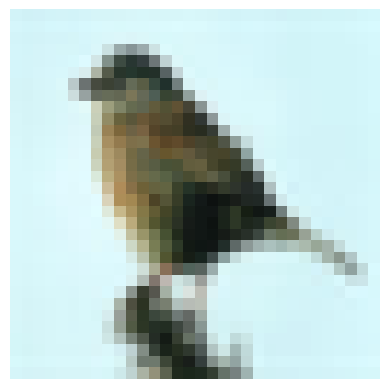

Top 16 Nearest Neighbors (in latent space)


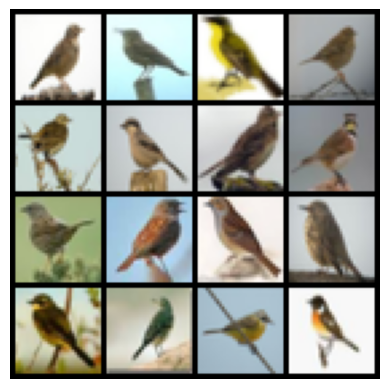

Image 2


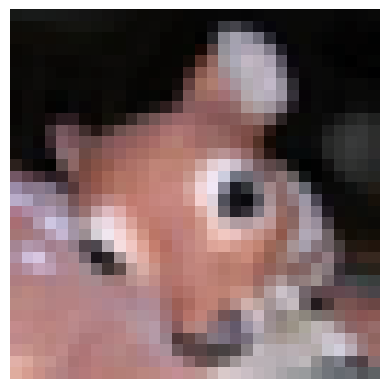

Top 16 Nearest Neighbors (in latent space)


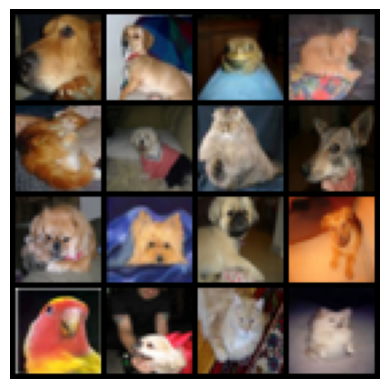

Image 3


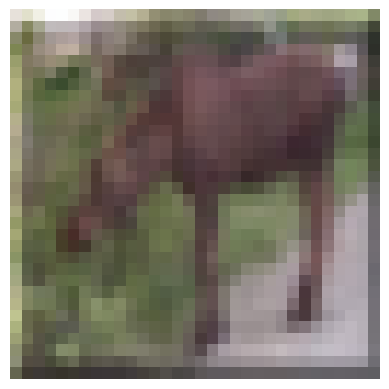

Top 16 Nearest Neighbors (in latent space)


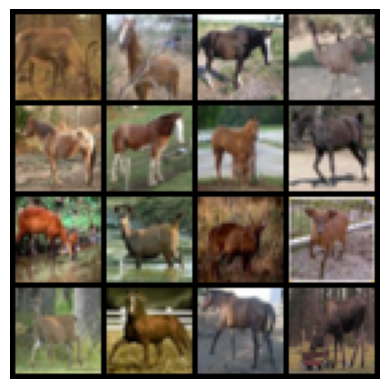

Image 4


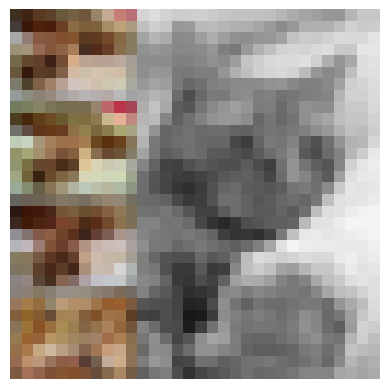

Top 16 Nearest Neighbors (in latent space)


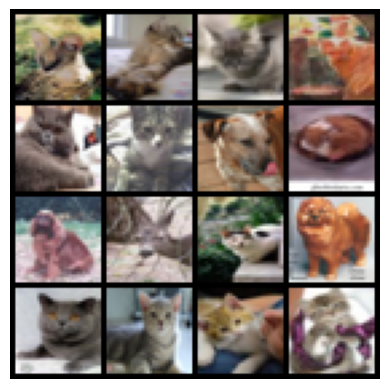

In [ ]:
display_nearest_neighbors('simclr', model, test_loader)

## Other Tasks
In addition to the above tasks, prior work has also investigated other self-superivsed tasks such as solving jigsaw puzzles [[4]](https://arxiv.org/abs/1603.09246), cycle-consistency [[5]](https://arxiv.org/abs/1903.07593), contrastive learning [[6]](https://arxiv.org/abs/1807.03748)[[7]](https://arxiv.org/abs/1905.09272)[[8]](https://arxiv.org/abs/1906.05849)[[9]](https://arxiv.org/abs/1911.05722), and patch prediction [[10]](https://arxiv.org/abs/1505.05192). See [here](https://github.com/jason718/awesome-self-supervised-learning) for a great resource on more self-supervised learning papers.

# Demo 4: Using Representations for Downstream Tasks

After pretraining a model on a self-supervised learning task, we can use it for other downstream tasks. In this demo, we use the pre-trained ResNet50 backbone from training SimCLR on a subset of ImageNet to learn a semantic segmentation model on Pascal VOC 2012. We use a simple U-Net [[11]](https://arxiv.org/abs/1505.04597) architecture with skip connections across feature maps between the SimCLR encoder and learned upsampling decoder. We do not fine-tune the SimCLR ResNet50 backbone, and only optimize the upsampling portion.

![](https://drive.google.com/uc?id=19dxxcwof0IA0jyv0VCl4rnZZf3ajA22s)

The training script can be found in `train_segmentation.py` [here](https://github.com/wilson1yan/cs294-158-ssl/blob/master/train_segmentation.py).

## Example Code

In [ ]:
# Code adapted from https://github.com/qubvel/segmentation_models.pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F
from deepul_helper.resnet import NormReLU

class SegmentationModel(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, n_classes):
        super().__init__()

        decoder_channels = (512, 256, 128, 64, 32)
        encoder_channels = (2048, 1024, 512, 256, 64) # Starting from head (resnet 50)

        # Construct decoder blocks
        in_channels = [encoder_channels[0]] + list(decoder_channels[:-1])
        skip_channels = list(encoder_channels[1:]) + [0]
        out_channels = decoder_channels
        blocks = [
            DecoderBlock(in_ch, skip_ch, out_ch)
            for in_ch, skip_ch, out_ch in zip(in_channels, skip_channels, out_channels)
        ]
        self.dec_blocks = nn.ModuleList(blocks)

        # Segmentation head for output prediction
        self.seg_head = nn.Conv2d(decoder_channels[-1], n_classes, kernel_size=3, padding=1)

    def forward(self, features, targets):
        features = features[1:] # remove first skip with same spatial resolution
        features = features[::-1] # reverse channels to start from head of encoder

        skips = features[1:]
        x = features[0]
        for i, decoder_block in enumerate(self.dec_blocks):
            skip = skips[i] if i < len(skips) else None
            x = decoder_block(x, skip)

        logits = self.seg_head(x)
        loss = F.cross_entropy(logits, targets)

        return dict(Loss=loss), logits


class DecoderBlock(nn.Module):
    def __init__(
            self,
            in_channels,
            skip_channels,
            out_channels,
    ):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels + skip_channels, out_channels,
                      kernel_size=3, padding=1),
            NormReLU((out_channels, None, None)), # only care about channel dim for BN
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            NormReLU((out_channels, None, None))
        )

    def forward(self, x, skip=None):
        x = F.interpolate(x, scale_factor=2, mode="nearest")
        if skip is not None:
            x = torch.cat([x, skip], dim=1)
        x = self.conv1(x)
        x = self.conv2(x)
        return x

## Segmentation Results
Below, we show a random subset of segmentations from the trained model. Every set of 3 images consists of the original image, the labeled segmentation, and the predicted segmentation.

Using downloaded and verified file: data/pascalvoc2012/VOCtrainval_11-May-2012.tar
Extracting data/pascalvoc2012/VOCtrainval_11-May-2012.tar to data/pascalvoc2012
Using downloaded and verified file: data/pascalvoc2012/VOCtrainval_11-May-2012.tar
Extracting data/pascalvoc2012/VOCtrainval_11-May-2012.tar to data/pascalvoc2012


/content/cs294-158-ssl/deepul_helper/demos.py:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(osp.join('results', 'imagenet100_simclr', 'seg_model_best.

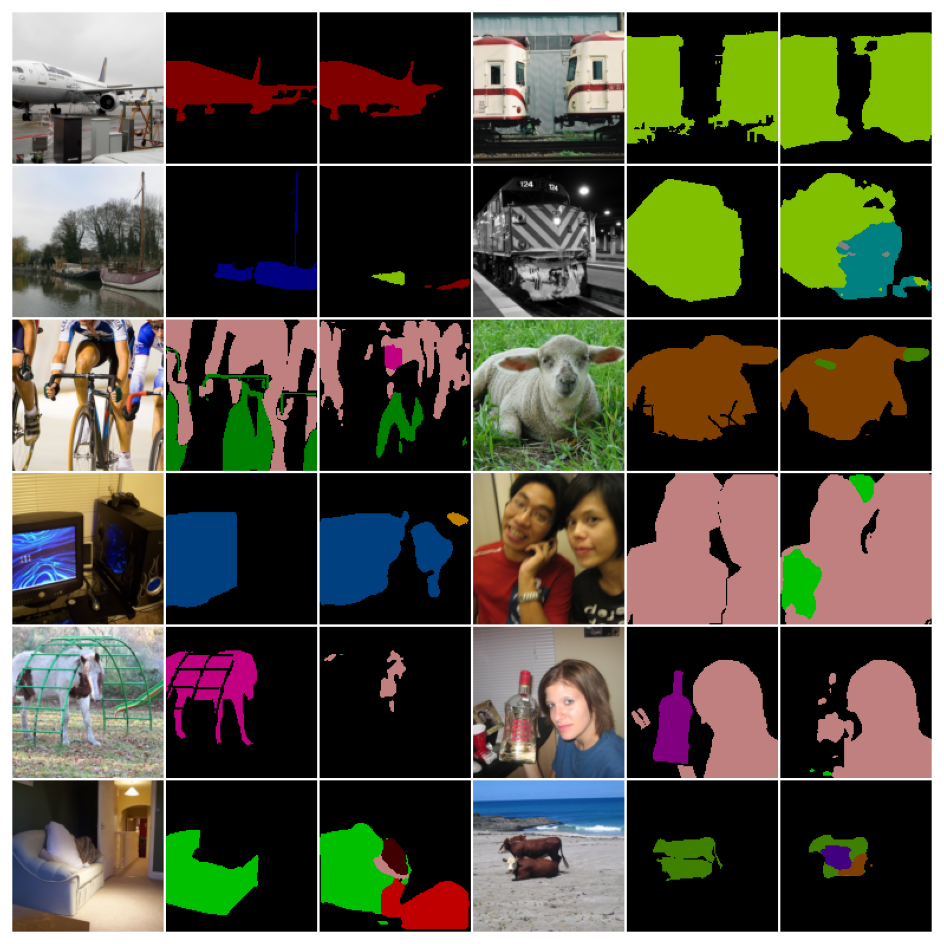

In [ ]:
from deepul_helper.demos import show_segmentation
show_segmentation()

# Demo 5: Avoiding Trivial Representations in Self-Supervised Tasks

When designing a self-supervised learning task, it is important to make sure that no trivial solutions exists. In general, a learned solution is trivial if the model is able to successfully complete its task by taking advantage of low-level features. As a result, it doesn't learn a good representation so downstream performance is bad.

For example, in the jigsaw [[4]](https://arxiv.org/abs/1603.09246) task, a model can "cheat" by just looking at the boundary textures of the jigsaw pieces, or following and matching straight lines across different pieces. These issues can generally be fixed by ranndom cropping, shifting, and spacially jittering.

We look at two other less obvious aspects of images that may reduce performance.

## Chromatic Aberration

Chromatic aberration occurs when the different focal lengths of light results in the light not meeting all at the same point.
![from wikipedia](https://drive.google.com/uc?id=1PYGoQWnH0aAeiE_8t4ef5WDcq1UIQQ5t)

A example of very apparent chromatic aberration is shown below, where the green and magenta colors are clearly offset with each other:

![](https://drive.google.com/uc?id=1M1B6kV6ddBwyJse3FQT8_XBTeqs5s5WL)

Chromatic aberration generally becomes a problem in patch-based self-supervised learning tasks that design, such as solving jigsaw puzzles, or predicintg the correct location of a patch in an image In this case, the model can take advantage of the low-level chromatic aberration features to get a strong idea of where the patch is located without understanding the actual context.

Below is a quick demo of chromatic aberration in more realistic images, and possible fixes. Note that in general, chromatic aberration is fairly hard to spot with the naked eye, but deep learning models are still able to use it to their advantage.

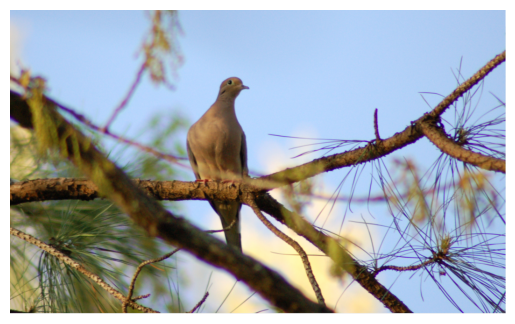

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# You can see some chromatic aberration in the purple fringes around the branches

image = Image.open('sample_images/chrom_ab_demo.png')
plt.figure()
plt.axis('off')
plt.imshow(image)
plt.show()

Chromatic aberration is generally fixed through conversion to grayscale, or color dropping. Color dropping works by dropping 2 of the color channels and replacing them with random noise uniform or Gaussian noise.

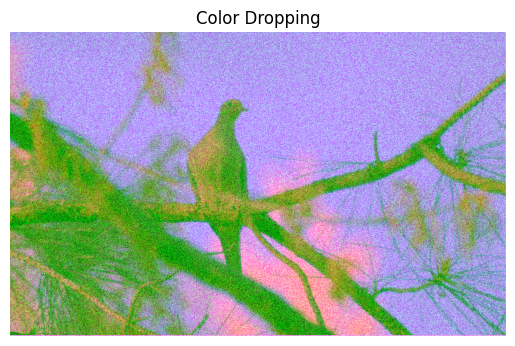

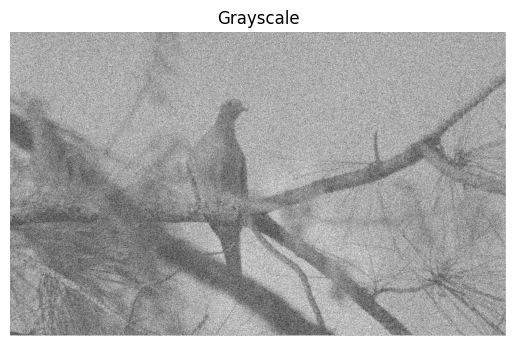

In [ ]:
import numpy as np

# Color Dropping
# We will drop all channels except R
image_cpy = image.copy()
pixels = image_cpy.load()

arr = np.array(image_cpy)
std_R = np.std(arr[:, :, 0])
mean_G, mean_B = np.mean(arr[:, :, 1]), np.mean(arr[:, :, 2])

for i in range(image.size[0]):
  for j in range(image.size[1]):
    p = pixels[i, j] # (R, G, B, A)
    R, A = p[0], p[3]
    G = int(np.random.randn() * std_R + mean_G)
    B = int(np.random.randn() * std_R + mean_B)
    pixels[i, j] = (R, G, p[2], p[3])

plt.figure()
plt.title('Color Dropping')
plt.axis('off')
plt.imshow(image_cpy)
plt.show()

# Grayscale
image_cpy2 = image.copy()
pixels2 = image_cpy2.load()

for i in range(image.size[0]):
  for j in range(image.size[1]):
    p = pixels[i, j]
    G = int(0.3 * p[0] + 0.59 * p[1] + 0.11 * p[2])
    pixels2[i, j] = (G, G, G, 255)

plt.figure()
plt.title('Grayscale')
plt.axis('off')
plt.imshow(image_cpy2)
plt.show()

## Color Intensity Histograms

In the SimCLR paper, the authors show that the histogram of color intensities of different patches within the same image have very similar histograms, which may degrade training by encouraging models to look at low-level (pixel intensity) features to solve self-supervised tasks that involve matching positive patches of the same image.

Below, we run a similar demo to what was demonstrated in the paper

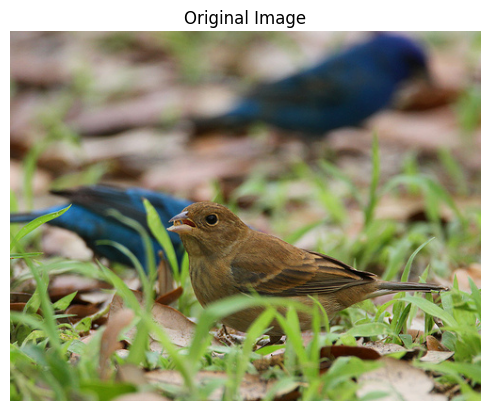

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('sample_images/n01537544_19414.JPEG')
plt.figure()
plt.title('Original Image')
plt.axis('off')
plt.imshow(image)
plt.show()

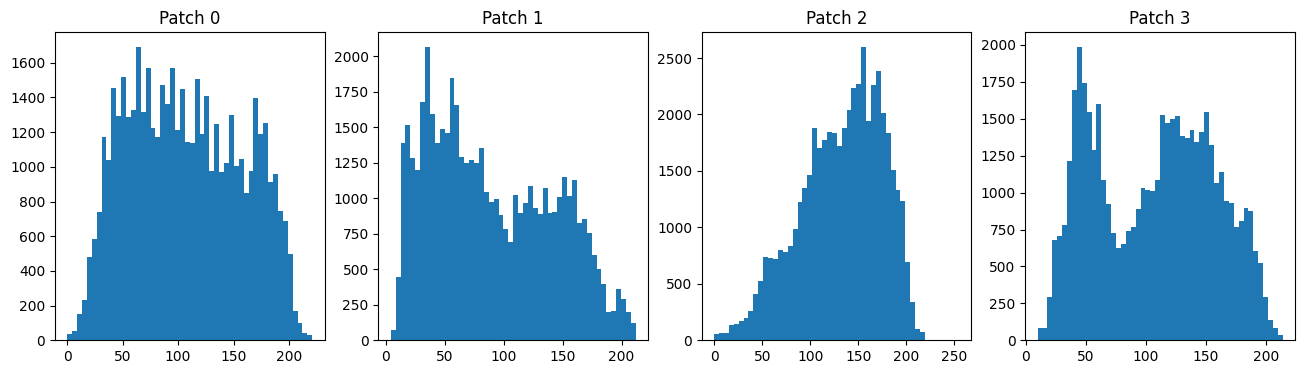

In [ ]:
import numpy as np
arr = np.array(image)
H, W, _ = arr.shape

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
  r = np.random.randint(0, H - 128)
  c = np.random.randint(0, W - 128)
  patch = arr[r:r+128, c:c+128]

  axs[i].set_title(f'Patch {i}')
  axs[i].hist(patch.reshape(-1), bins=50)
plt.show()

Now we apply color jittering to mitigate this effect

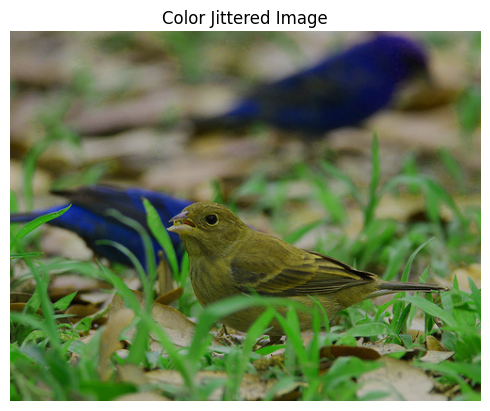

In [ ]:
from torchvision import transforms

color_jitter = transforms.ColorJitter(0.3, 0.3, 0.3, 0.3)
jitter_img = color_jitter(image)

image = Image.open('sample_images/n01537544_19414.JPEG')
plt.figure()
plt.title('Color Jittered Image')
plt.axis('off')
plt.imshow(jitter_img)
plt.show()

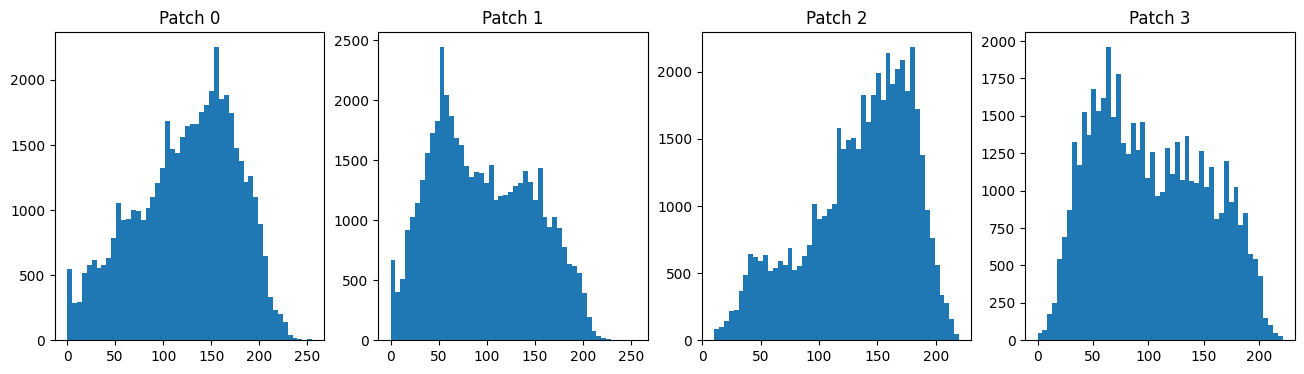

In [ ]:
arr = np.array(image)
H, W, _ = arr.shape

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
  r = np.random.randint(0, H - 128)
  c = np.random.randint(0, W - 128)
  patch = arr[r:r+128, c:c+128]

  axs[i].set_title(f'Patch {i}')
  axs[i].hist(patch.reshape(-1), bins=50)
plt.show()

# Histogramme de comparaison TOP-1 et TOP-5 accuracy

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_accuracy_comparison(train_acc1, test_acc1, train_acc5, test_acc5, tasks):
    # Paramètres des barres
    bar_width = 0.15
    bar_separation = 0.025
    index = np.arange(len(tasks))

    # Création de la figure
    plt.figure(figsize=(12, 6))

    # Création des barres pour chaque accuracy
    plt.bar(index - bar_width - bar_separation, train_acc1, bar_width, color='lightblue', label='Top 1 Accuracy (Train)')
    plt.bar(index, test_acc1, bar_width, color='lightgreen', label='Top 1 Accuracy (Test)')
    plt.bar(index + bar_width + bar_separation, train_acc5, bar_width, color='salmon', label='Top 5 Accuracy (Train)')
    plt.bar(index + 2 * (bar_width + bar_separation), test_acc5, bar_width, color='orange', label='Top 5 Accuracy (Test)')

    # Ajout des valeurs sur les barres
    for idx, value in enumerate(train_acc1):
        plt.text(index[idx] - bar_width - bar_separation, value + 0.01, f'{value:.2f}', ha='center', va='bottom')
    for idx, value in enumerate(test_acc1):
        plt.text(index[idx], value + 0.01, f'{value:.2f}', ha='center', va='bottom')
    for idx, value in enumerate(train_acc5):
        plt.text(index[idx] + bar_width + bar_separation, value + 0.01, f'{value:.2f}', ha='center', va='bottom')
    for idx, value in enumerate(test_acc5):
        plt.text(index[idx] + 2 * (bar_width + bar_separation), value + 0.01, f'{value:.2f}', ha='center', va='bottom')

    # Configuration des axes
    plt.xlabel('Tasks')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison for Each Task')
    plt.xticks(index, tasks)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Question 3 : Comparaisons sur CIFAR10

In [6]:
from deepul_helper.demos import evaluate_classifier

In [7]:
def evaluate_accuracy_v2(model, linear_classifier, train_loader, test_loader):
    # Évaluation des top-1 et top-5 accuracies sur les données d'entraînement et de test
    train_acc1, train_acc5 = evaluate_classifier(model, linear_classifier, train_loader)
    test_acc1, test_acc5 = evaluate_classifier(model, linear_classifier, test_loader)
    return train_acc1, train_acc5, test_acc1, test_acc5

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


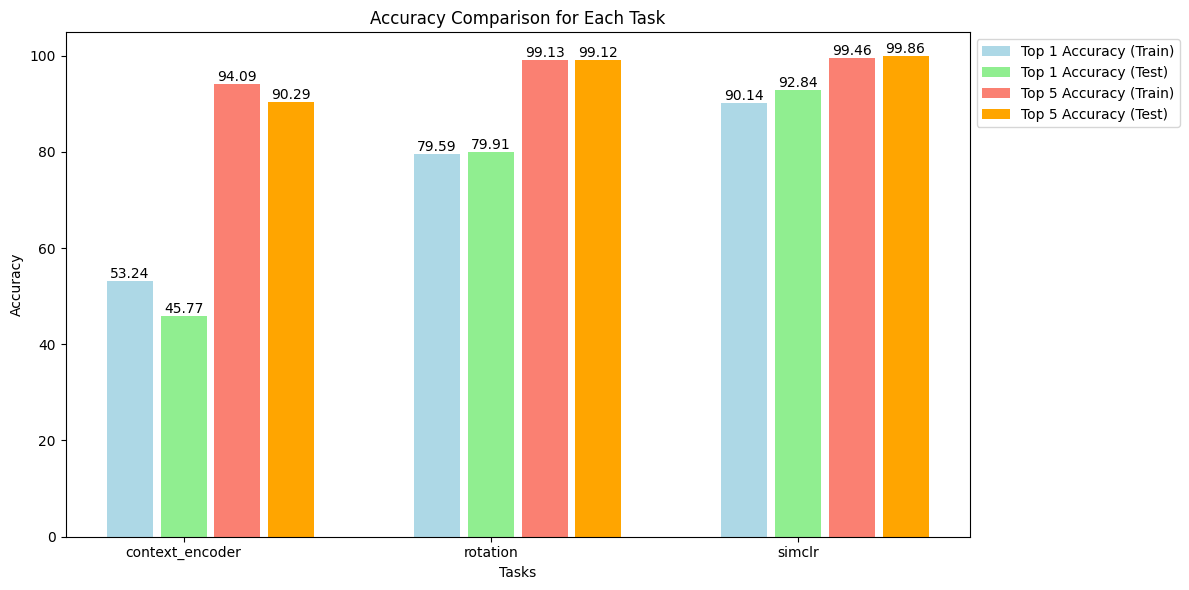

In [ ]:
# Initialisation des listes d'accuracies
train_acc1 = [0, 0, 0]
test_acc1 = [0, 0, 0]
train_acc5 = [0, 0, 0]
test_acc5 = [0, 0, 0]

# Chargement des modèles et données, puis évaluation
model, linear_classifier, train_loader, test_loader = load_model_and_data('context_encoder')
train_acc1[0], train_acc5[0], test_acc1[0], test_acc5[0] = evaluate_accuracy_v2(model, linear_classifier, train_loader, test_loader)

model, linear_classifier, train_loader, test_loader = load_model_and_data('rotation')
train_acc1[1], train_acc5[1], test_acc1[1], test_acc5[1] = evaluate_accuracy_v2(model, linear_classifier, train_loader, test_loader)

model, linear_classifier, train_loader, test_loader = load_model_and_data('simclr')
train_acc1[2], train_acc5[2], test_acc1[2], test_acc5[2] = evaluate_accuracy_v2(model, linear_classifier, train_loader, test_loader)

# Définition des tâches
tasks = ["context_encoder", "rotation", "simclr"]

# Appel de la fonction de tracé avec les données d'accuracy et les tâches
plot_accuracy_comparison(train_acc1, test_acc1, train_acc5, test_acc5, tasks)

# Question 4 : Comparaisons sur STL10

## Récupération des données de STL10 et utilisation de transformations pour rendre compatible les données

In [8]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torchvision.transforms.functional as F
import torch

In [9]:
# Définir les transformations pour les images
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
transform2 = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

# Téléchargement et chargement des datasets de test STL10
test_dataset1 = datasets.STL10(root='./data', split='test', download=True, transform=transform)
test_dataset2 = datasets.STL10(root='./data', split='test', download=True, transform=transform2)
test_dataset3 = datasets.STL10(root='./data', split='test', download=True)

# Création des DataLoaders
test_loader1 = DataLoader(test_dataset1, batch_size=32, shuffle=False, num_workers=2)
test_loader2 = DataLoader(test_dataset2, batch_size=32, shuffle=False, num_workers=2)

100%|██████████| 2.64G/2.64G [05:51<00:00, 7.52MB/s]


Extracting ./data/stl10_binary.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified


Pour SimCLR il nous faut deux vues pour une même image, je crée ici une classe dédié à ce procesus.

In [10]:
class SimCLRDatasetWrapper(Dataset):
    def __init__(self, dataset, transform1, transform2):
        # Initialisation de la classe avec le dataset et deux transformations
        self.dataset = dataset
        self.transform1 = transform1
        self.transform2 = transform2

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Récupère l'image et l'étiquette correspondante à l'index donné
        image, label = self.dataset[idx]

        if isinstance(image, torch.Tensor):
            image = F.to_pil_image(image)

        # Applique les transformations pour générer deux vues différentes
        view1 = self.transform1(image)
        view2 = self.transform2(image)

        # Retourne les deux vues et l'étiquette
        return (view1, view2), label

# Définir deux pipelines de transformation distincts pour SimCLR
simclr_transform1 = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

simclr_transform2 = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

simclr_test_dataset = SimCLRDatasetWrapper(test_dataset3, simclr_transform1, simclr_transform2)

# Crée le DataLoader avec le jeu de données spécifique à SimCLR
test_loader3 = DataLoader(simclr_test_dataset, batch_size=32, shuffle=False, num_workers=2)

### Affichage des shape pour chaque model

In [ ]:
# model, linear_classifier, train_loader, _ = load_model_and_data('context_encoder')
# # Obtenir un batch du DataLoader
# images, labels = next(iter(train_loader))

# # Afficher la taille d'une image dans le batch
# print("Dimensions d'une image dans test_loader:", images[0].shape)

# model, linear_classifier, train_loader, _ = load_model_and_data('rotation')
# # Obtenir un batch du DataLoader
# images, labels = next(iter(train_loader))

# # Afficher la taille d'une image dans le batch
# print("Dimensions d'une image dans test_loader:", images[0].shape)

# model, linear_classifier, train_loader, _  = load_model_and_data('simclr')
# # Obtenir un batch du DataLoader
# images, labels = next(iter(train_loader))

# # Afficher la taille d'une image dans le batch
# print("Dimensions d'une image dans test_loader:", images[0].shape)

Files already downloaded and verified
Files already downloaded and verified
Dimensions d'une image dans test_loader: torch.Size([3, 128, 128])
Files already downloaded and verified
Files already downloaded and verified
Dimensions d'une image dans test_loader: torch.Size([3, 32, 32])
Files already downloaded and verified
Files already downloaded and verified
Dimensions d'une image dans test_loader: torch.Size([128, 3, 32, 32])


## Evaluation sur le dataset STL10

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/content/cs294-158-ssl/deepul_helper/demos.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickli

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


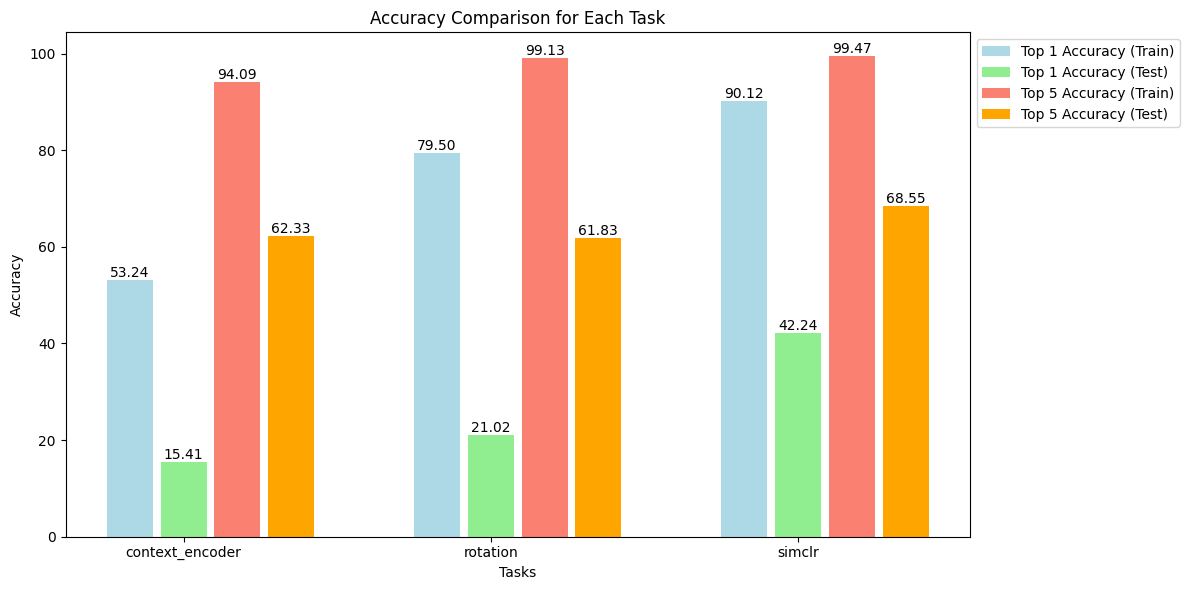

In [ ]:
# Initialisation des listes d'accuracies
train_acc1 = [0, 0, 0]
test_acc1 = [0, 0, 0]
train_acc5 = [0, 0, 0]
test_acc5 = [0, 0, 0]

# Chargement des modèles et données, puis évaluation
model, linear_classifier, train_loader, _ = load_model_and_data('context_encoder')
train_acc1[0], train_acc5[0], test_acc1[0], test_acc5[0] = evaluate_accuracy_v2(model, linear_classifier, train_loader, test_loader1)

model, linear_classifier, train_loader, _ = load_model_and_data('rotation')
train_acc1[1], train_acc5[1], test_acc1[1], test_acc5[1] = evaluate_accuracy_v2(model, linear_classifier, train_loader, test_loader2)

model, linear_classifier, train_loader, _  = load_model_and_data('simclr')
train_acc1[2], train_acc5[2], test_acc1[2], test_acc5[2] = evaluate_accuracy_v2(model, linear_classifier, train_loader, test_loader3)

# Définition des tâches
tasks = ["context_encoder", "rotation", "simclr"]

# Appel de la fonction de tracé avec les données d'accuracy et les tâches
plot_accuracy_comparison(train_acc1, test_acc1, train_acc5, test_acc5, tasks)

# Question 5 : Entrainement du model sur la tache pretexte Relative Positioning et classifieur

In [11]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import datasets, transforms
import numpy as np
import random
import matplotlib.pyplot as plt

## Création du dataset et transformations

In [12]:
# Préparation du dataset STL10 et des transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale()
])

# Chargement du dataset STL-10
# unlabeled car on a pas besoin de connaitre les labels
stl10_dataset = datasets.STL10(root='./data', split='unlabeled', download=True, transform=transform)

# Division du dataset en ensembles d'entraînement et de test (80% train, 20% test)
train_size = int(0.8 * len(stl10_dataset))
test_size = len(stl10_dataset) - train_size
train_dataset, test_dataset = random_split(stl10_dataset, [train_size, test_size])


Files already downloaded and verified


In [13]:
# Fonction pour découper une image en 9 patchs et sélectionner une paire (ancre, requête) avec une étiquette de position relative
def create_patches(image, grid_size=3, jitter=5):
    _, h, w = image.size()
    patch_h, patch_w = h // grid_size, w // grid_size
    patches = []

    for i in range(grid_size):
        for j in range(grid_size):
            # Calcul du décalage aléatoire dans les limites de jitter
            jitter_y = random.randint(-jitter, jitter)
            jitter_x = random.randint(-jitter, jitter)

            # Calcul des limites de découpe avec le jitter
            start_y = max(0, i * patch_h + jitter_y)
            start_x = max(0, j * patch_w + jitter_x)
            end_y = min(h, start_y + patch_h)
            end_x = min(w, start_x + patch_w)

            # Découpe du patch avec le jitter appliqué
            patch = image[:, start_y:end_y, start_x:end_x]

            # Redimensionnement pour garantir des dimensions constantes
            patch = nn.functional.interpolate(patch.unsqueeze(0), size=(patch_h, patch_w), mode='bilinear').squeeze(0)
            patches.append(patch)

    return patches


def select_pair(patches):
    anchor_idx = random.randint(0, 8)

    # Liste des indices adjacents
    adjacent_indices = {
        0: [1, 3, 4], 1: [0, 2, 3, 4, 5], 2: [1, 4, 5],
        3: [0, 1, 4, 6, 7], 4: [0, 1, 2, 3, 5, 6, 7, 8],
        5: [1, 2, 4, 7, 8], 6: [3, 4, 7], 7: [3, 4, 5, 6, 8],
        8: [4, 5, 7]
    }

    query_idx = random.choice(adjacent_indices[anchor_idx])

    # Calcul de la position relative
    dx, dy = query_idx // 3 - anchor_idx // 3, query_idx % 3 - anchor_idx % 3
    relative_position = {(0, -1): 0, (0, 1): 1, (-1, 0): 2, (1, 0): 3, (-1, -1): 4, (-1, 1): 5, (1, -1): 6, (1, 1): 7}
    label = relative_position[(dx, dy)]

    return patches[anchor_idx], patches[query_idx], label

class PretextDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, _ = self.dataset[idx]
        patches = create_patches(image)
        anchor, query, label = select_pair(patches)
        return anchor, query, label

# Chargement des données pour la tâche prétexte
train_pretext_dataset = PretextDataset(train_dataset)
test_pretext_dataset = PretextDataset(test_dataset)

train_dataloader = DataLoader(train_pretext_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_pretext_dataset, batch_size=64, shuffle=False)

## Visualiser une image pour exemple

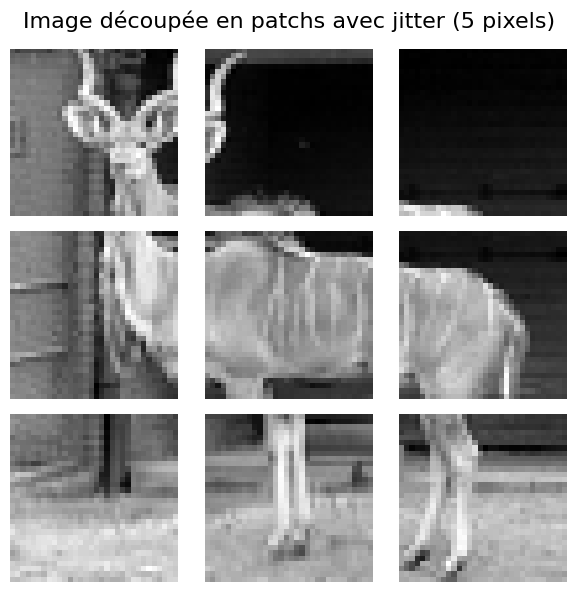

In [ ]:
# Fonction pour afficher les patch
def visualize_patches_with_jitter(image, grid_size=3, jitter=5):
    # Découpe l'image en patchs
    patches = create_patches(image, grid_size, jitter)

    # Crée une figure 3x3 pour afficher chaque patch
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(6, 6))
    fig.suptitle(f"Image découpée en patchs avec jitter ({jitter} pixels)", fontsize=16)

    # Affiche chaque patch dans sa position d'origine
    for i in range(grid_size):
        for j in range(grid_size):
            patch_idx = i * grid_size + j
            patch = patches[patch_idx].squeeze(0)
            axes[i, j].imshow(patch, cmap='gray')
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

image, _ = stl10_dataset[0]
visualize_patches_with_jitter(image, grid_size=3, jitter=5)

## Entrainement pour la tache pretexte

In [14]:
# Modèle simple de prédiction
class PretextModel(nn.Module):
    def __init__(self):
        super(PretextModel, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc = nn.Linear(64*8*8*2, 8)  # Deux patchs de 64x8x8 en entrée et 8 classes de sortie

    def forward(self, anchor, query):
        anchor_feat = self.encoder(anchor).view(anchor.size(0), -1)
        query_feat = self.encoder(query).view(query.size(0), -1)
        combined_feat = torch.cat([anchor_feat, query_feat], dim=1)
        return self.fc(combined_feat)

# Initialisation et configuration du modèle
model = PretextModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entraînement du modèle
def train(model, dataloader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for anchor, query, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(anchor, query)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(dataloader):.4f}')

train(model, train_dataloader, criterion, optimizer)

Epoch [1/5], Loss: 1.8678
Epoch [2/5], Loss: 1.7841
Epoch [3/5], Loss: 1.7588
Epoch [4/5], Loss: 1.7479
Epoch [5/5], Loss: 1.7325


### Evaluation sur la tache pretexte

In [15]:
# Fonction pour évaluer le modèle
def evaluate_accuracy(model, data_loader):
    acc1, acc5 = 0, 0
    model.eval()
    with torch.no_grad():
        correct1, correct5, total = 0, 0, 0
        for anchor, query, labels in data_loader:
            outputs = model(anchor, query)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct1 += (predicted == labels).sum().item()

            # Calcul de Top-5 accuracy
            top5_predictions = torch.topk(outputs, 5).indices  # Obtenir les 5 meilleures prédictions
            correct5 += (top5_predictions == labels.view(-1, 1)).sum().item()  # Vérifier si la vraie étiquette est dans les 5 meilleures

    acc1 = 100 * correct1 / total
    acc5 = 100 * correct5 / total
    return acc1, acc5

# Initialisation des listes d'accuracies
train_acc1 = [0]
test_acc1 = [0]
train_acc5 = [0]
test_acc5 = [0]

# Évaluation sur l'ensemble d'entraînement et de test
train_acc1[0], train_acc5[0] = evaluate_accuracy(model, train_dataloader)
test_acc1[0], test_acc5[0] = evaluate_accuracy(model, test_dataloader)

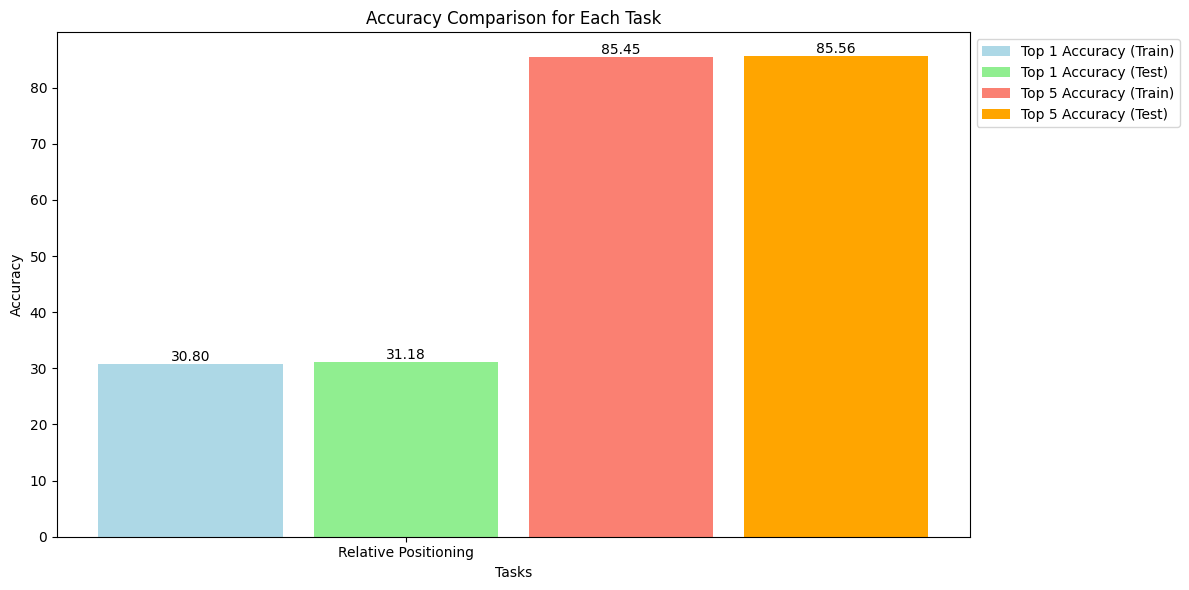

In [16]:
# Définition des tâches
tasks = ["Relative Positioning"]

# Appel de la fonction de tracé avec les données d'accuracy et les tâches
plot_accuracy_comparison(train_acc1, test_acc1, train_acc5, test_acc5, tasks)

## Entrainement pour la tache de classification

In [17]:
stl10_train = datasets.STL10(root='./data', split='train', download=True, transform=transform)
stl10_test = datasets.STL10(root='./data', split='test', download=True, transform=transform)

train_dataloader_stl10 = DataLoader(stl10_train, batch_size=64, shuffle=True)
test_dataloader_stl10 = DataLoader(stl10_test, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [18]:
class ClassifierModel(nn.Module):
    def __init__(self, pretext_model):
        super(ClassifierModel, self).__init__()
        self.encoder = pretext_model.encoder  # Reprend l'encodeur du modèle prétexte
        self.fc = nn.Linear(64 * 24 * 24, 10)  # 10 classes pour STL10

    def forward(self, x):
        features = self.encoder(x).view(x.size(0), -1)
        return self.fc(features)

# Initialisation du classifieur
classifier = ClassifierModel(model)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

In [19]:
def train_classifier(model, dataloader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(dataloader):.4f}')

# Entraînement du classifieur
train_classifier(classifier, train_dataloader_stl10, criterion, optimizer)

Epoch [1/5], Loss: 1.6202
Epoch [2/5], Loss: 1.0436
Epoch [3/5], Loss: 0.7325
Epoch [4/5], Loss: 0.5256
Epoch [5/5], Loss: 0.3646


### Evaluation classifieur

In [20]:
# Fonction pour évaluer le classifieur
def evaluate_accuracy2(model, data_loader):
    acc1, acc5 = 0, 0
    model.eval()
    with torch.no_grad():
        correct1, correct5, total = 0, 0, 0
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct1 += (predicted == labels).sum().item()

            top5_predictions = torch.topk(outputs, 5).indices
            correct5 += (top5_predictions == labels.view(-1, 1)).sum().item()

    acc1 = 100 * correct1 / total
    acc5 = 100 * correct5 / total
    return acc1, acc5

In [21]:
# Initialisation des listes d'accuracies
train_acc1 = [0]
test_acc1 = [0]
train_acc5 = [0]
test_acc5 = [0]

# Évaluation sur l'ensemble d'entraînement et de test
train_acc1[0], train_acc5[0] = evaluate_accuracy2(classifier, train_dataloader_stl10)
test_acc1[0], test_acc5[0] = evaluate_accuracy2(classifier, test_dataloader_stl10)

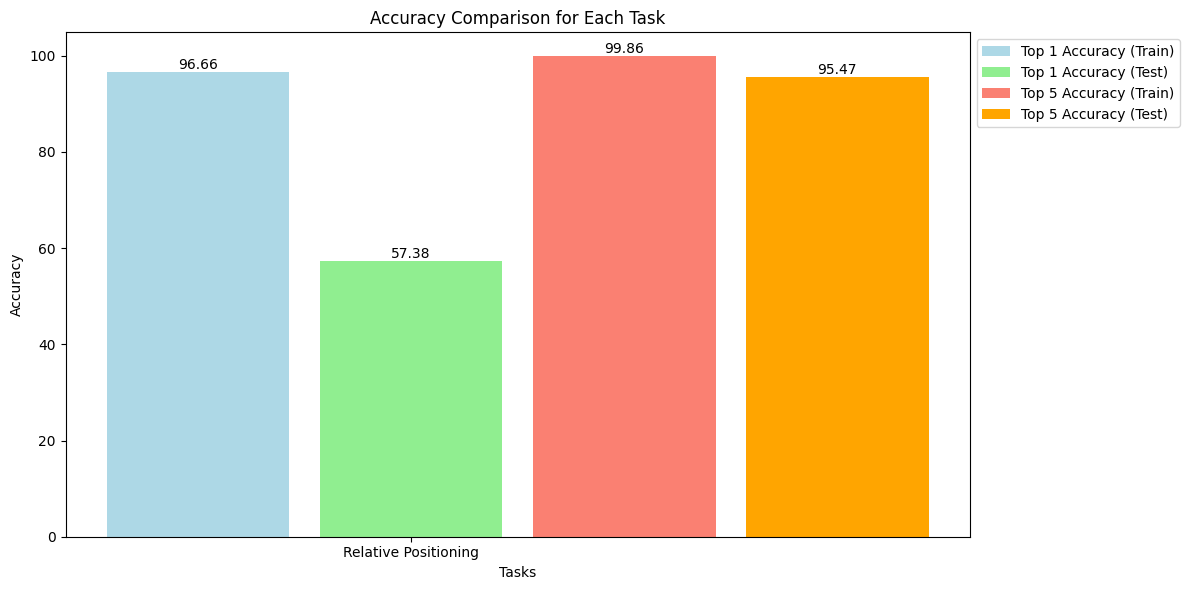

In [22]:
# Définition des tâches
tasks = ["Relative Positioning"]

# Appel de la fonction de tracé avec les données d'accuracy et les tâches
plot_accuracy_comparison(train_acc1, test_acc1, train_acc5, test_acc5, tasks)

### Test sur un autre dataset

In [23]:
# Préparation du dataset cifar10 et des transformations
transform_cifar10 = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.ToTensor(),
    transforms.Grayscale()
])

In [24]:
cifar10_test = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_cifar10)

test_dataloader_cifar10 = DataLoader(cifar10_test, batch_size=64, shuffle=False)

100%|██████████| 170M/170M [00:13<00:00, 12.6MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [28]:
# Initialisation des listes d'accuracies
train_acc1 = [0]
test_acc1 = [0]
train_acc5 = [0]
test_acc5 = [0]

# Évaluation sur l'ensemble d'entraînement et de test
test_acc1[0], test_acc5[0] = evaluate_accuracy2(classifier, test_dataloader_cifar10)
train_acc1[0], train_acc5[0] = evaluate_accuracy2(classifier, train_dataloader_stl10)

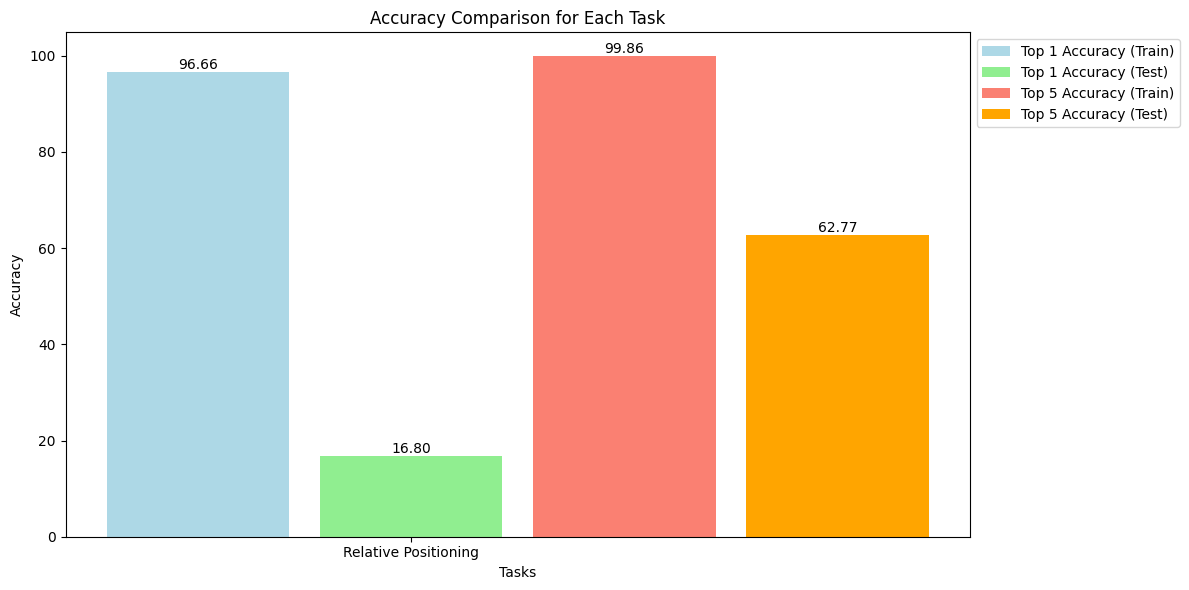

In [29]:
# Définition des tâches
tasks = ["Relative Positioning"]

# Appel de la fonction de tracé avec les données d'accuracy et les tâches
plot_accuracy_comparison(train_acc1, test_acc1, train_acc5, test_acc5, tasks)

# Récapitulatif de tous les résultats

## Cifar10

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/content/cs294-158-ssl/deepul_helper/demos.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickli

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


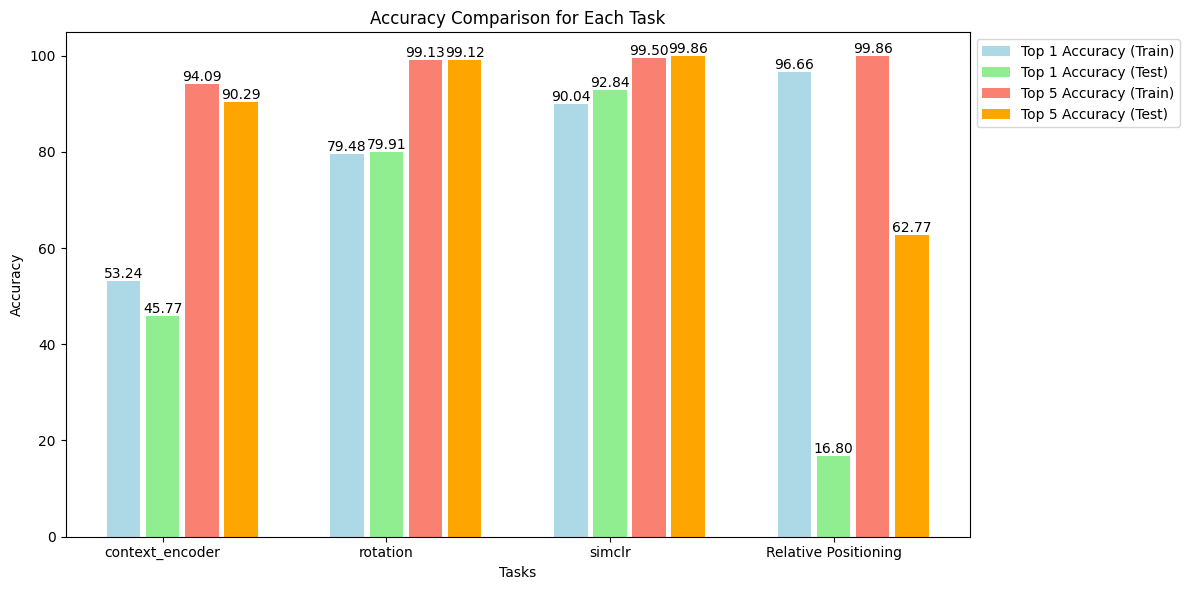

In [30]:
# Initialisation des listes d'accuracies
train_acc1 = [0, 0, 0, 0]
test_acc1 = [0, 0, 0, 0]
train_acc5 = [0, 0, 0, 0]
test_acc5 = [0, 0, 0, 0]

# Chargement des modèles et données, puis évaluation
model, linear_classifier, train_loader, test_loader = load_model_and_data('context_encoder')
train_acc1[0], train_acc5[0], test_acc1[0], test_acc5[0] = evaluate_accuracy_v2(model, linear_classifier, train_loader, test_loader)

model, linear_classifier, train_loader, test_loader = load_model_and_data('rotation')
train_acc1[1], train_acc5[1], test_acc1[1], test_acc5[1] = evaluate_accuracy_v2(model, linear_classifier, train_loader, test_loader)

model, linear_classifier, train_loader, test_loader = load_model_and_data('simclr')
train_acc1[2], train_acc5[2], test_acc1[2], test_acc5[2] = evaluate_accuracy_v2(model, linear_classifier, train_loader, test_loader)

test_acc1[3], test_acc5[3] = evaluate_accuracy2(classifier, test_dataloader_cifar10)
train_acc1[3], train_acc5[3] = evaluate_accuracy2(classifier, train_dataloader_stl10)

# Définition des tâches
tasks = ["context_encoder", "rotation", "simclr", "Relative Positioning"]

# Appel de la fonction de tracé avec les données d'accuracy et les tâches
plot_accuracy_comparison(train_acc1, test_acc1, train_acc5, test_acc5, tasks)

## STL10

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


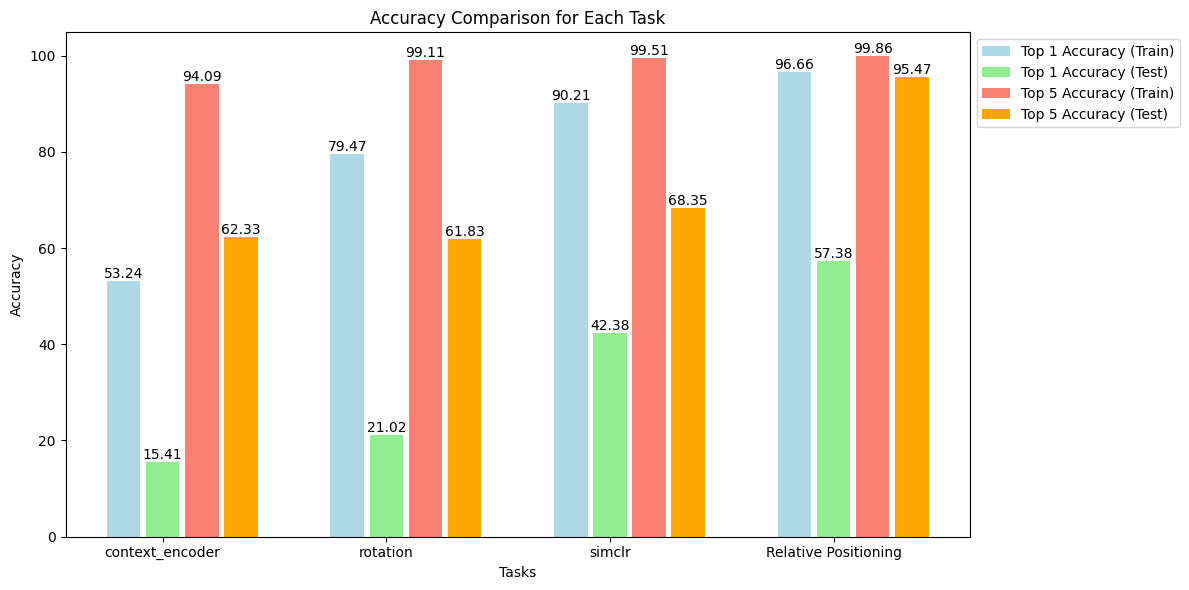

In [32]:
# Initialisation des listes d'accuracies
train_acc1 = [0, 0, 0, 0]
test_acc1 = [0, 0, 0, 0]
train_acc5 = [0, 0, 0, 0]
test_acc5 = [0, 0, 0, 0]

# Chargement des modèles et données, puis évaluation
model, linear_classifier, train_loader, _ = load_model_and_data('context_encoder')
train_acc1[0], train_acc5[0], test_acc1[0], test_acc5[0] = evaluate_accuracy_v2(model, linear_classifier, train_loader, test_loader1)

model, linear_classifier, train_loader, _ = load_model_and_data('rotation')
train_acc1[1], train_acc5[1], test_acc1[1], test_acc5[1] = evaluate_accuracy_v2(model, linear_classifier, train_loader, test_loader2)

model, linear_classifier, train_loader, _ = load_model_and_data('simclr')
train_acc1[2], train_acc5[2], test_acc1[2], test_acc5[2] = evaluate_accuracy_v2(model, linear_classifier, train_loader, test_loader3)

train_acc1[3], train_acc5[3] = evaluate_accuracy2(classifier, train_dataloader_stl10)
test_acc1[3], test_acc5[3] = evaluate_accuracy2(classifier, test_dataloader_stl10)

# Définition des tâches
tasks = ["context_encoder", "rotation", "simclr", "Relative Positioning"]

# Appel de la fonction de tracé avec les données d'accuracy et les tâches
plot_accuracy_comparison(train_acc1, test_acc1, train_acc5, test_acc5, tasks)